In [ ]:
%load_ext autoreload
%load_ext autotime

time: 157 µs (started: 2024-12-12 22:23:24 -08:00)


In [2]:
import os
import sys
import time
import warnings
from bokeh.io import output_notebook

# Add WisIO to the path
sys.path.append(os.path.abspath("../"))

# Filter warnings
warnings.filterwarnings('ignore')

# Set the notebook to display Bokeh plots
output_notebook()

Loading BokehJS ...

time: 848 ms (started: 2024-12-12 22:23:24 -08:00)


In [3]:
analyzer = "dftracer"

run_dir = f".wisio/{analyzer}/{int(time.time())}"
bottleneck_dir = f"{run_dir}/bottlenecks"
checkpoint_dir = f"{run_dir}/checkpoints"

cluster = "external"
cluster_restart_on_connect = True
cluster_scheduler_address = "tcp://127.0.0.1:46423"

checkpoint = False
exclude_characteristics = ['node_count', 'app_count', 'proc_count', 'file_count']
logical_view_types = False
percentile = 0.95
time_granularity = 1e6
trace_path = "/p/lustre3/iopp/dftracer-traces-lfs/v1.0.5-develop/corona/cm1/APP/node-1/v1/RAW/*.pfw.gz"

app_metrics = [
    'intensity',
    'io_compute_per',
    # 'io_bw',
    # 'io_time_norm',
    # 'io_time_per',
    'ops',
    'time_norm',
    'time_per',
    # 'u_checkpoint_io_time',
    # 'u_io_time_per',
    # 'u_read_io_time',
]
dataloader_metrics = [
    'intensity',
    # 'io_bw',
    # 'io_time_norm',
    # 'io_time_per',
    'ops',
    # 'read_bw',
    'time_norm',
    'time_per',
    # 'write_bw',
]
posix_metrics = [
    'intensity',
    'data_bw',
    'data_time_norm',
    'data_time_per',
    'ops',
    # 'read_bw',
    'time_norm',
    'time_per',
    # 'write_bw',
]

app_view_types = ['proc_name', 'time_range']
dataloader_view_types = ['proc_name', 'time_range']
posix_view_types = ['proc_name', 'time_range']

time_view_type = 'time_range'
unoverlapped_posix_only = False

output_compact = False
output_group_behavior = False
output_max_bottlenecks = 1
output_root_only = True


time: 1.52 ms (started: 2024-12-12 22:23:32 -08:00)


In [4]:
# Parameters
analyzer = "dftracer"
bottleneck_dir = "/p/lustre3/iopp/wisio-bottlenecks/dftracer-resnet50-dlio-v100-node-4-v1-proc_name-time_range"
checkpoint = True
checkpoint_dir = "/p/lustre3/iopp/wisio-checkpoints/dftracer-resnet50-dlio-v100-node-4-v1-proc_name-time_range"
cluster = "external"
cluster_restart_on_connect = True
cluster_scheduler_address = "tcp://127.0.0.1:36047"
logical_view_types = False
output_max_bottlenecks = 3
output_root_only = False
percentile = 0.6
run_dir = ".wisio/dftracer-resnet50-dlio-v100-node-4-v1-proc_name-time_range"
time_granularity = 2000000.0
trace_path = "/p/lustre3/iopp/dftracer-traces-lfs/v1.0.5-develop/corona/resnet50/dlio-v100/node-4/v1/RAW/*.pfw.gz"

app_view_types = ["proc_name", "time_range"]
dataloader_view_types = ["proc_name", "time_range"]
posix_view_types = ["proc_name", "time_range"]


time: 1.03 ms (started: 2024-12-12 22:23:39 -08:00)


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [5]:
from distributed import Client
from hydra import compose, initialize
from hydra.core.hydra_config import HydraConfig
from hydra.utils import instantiate
from wisio.cluster import ExternalCluster
from wisio.config import init_hydra_config_store
from wisio.utils.file_utils import ensure_dir

ensure_dir(run_dir)

with initialize(version_base=None, config_path=None):
    init_hydra_config_store()
    cfg = compose(
        config_name="config",
        overrides=[
            f"+analyzer={analyzer}",
            f"analyzer.bottleneck_dir={bottleneck_dir}",
            f"analyzer.checkpoint={checkpoint}",
            f"analyzer.checkpoint_dir={checkpoint_dir}",
            f"analyzer.time_granularity={time_granularity}",
            # f"cluster={cluster}",
            # f"cluster.restart_on_connect={cluster_restart_on_connect}",
            # f"cluster.scheduler_address={cluster_scheduler_address}",
            "cluster=external",
            "cluster.scheduler_address=tcp://127.0.0.1:46065",
            f"exclude_characteristics=[{','.join(exclude_characteristics)}]",
            f"hydra.run.dir={run_dir}",
            f"hydra.runtime.output_dir={run_dir}",
            f"logical_view_types={logical_view_types}",
            f"output.compact={output_compact}",
            f"output.group_behavior={output_group_behavior}",
            f"output.max_bottlenecks={output_max_bottlenecks}",
            f"output.root_only={output_root_only}",
            f"percentile={percentile}",
            f"trace_path={trace_path}",
        ],
        return_hydra_config=True,
    )
    HydraConfig.instance().set_config(cfg)
    cluster = instantiate(cfg.cluster)
    if isinstance(cluster, ExternalCluster):
        client = Client(cluster.scheduler_address)
        if cluster.restart_on_connect:
            client.restart()
    else:
        client = Client(cluster)
    analyzer = instantiate(cfg.analyzer)
    output = instantiate(cfg.output)

time: 3.13 s (started: 2024-12-12 22:23:46 -08:00)


In [6]:
client.dashboard_link

'http://127.0.0.1:8787/status'

time: 5.6 ms (started: 2024-12-12 22:23:50 -08:00)


In [7]:
client.restart()

<Client: 'tcp://127.0.0.1:46065' processes=7 threads=7>

time: 3.59 s (started: 2024-12-12 22:23:50 -08:00)


In [8]:
from wisio.constants import Layer

result = analyzer.analyze_trace(
    trace_path=cfg.trace_path,
    bottleneck_rules=cfg.bottleneck_rules,
    exclude_bottlenecks=cfg.exclude_bottlenecks,
    exclude_characteristics=cfg.exclude_characteristics,
    logical_view_types=cfg.logical_view_types,
    percentile=cfg.percentile,
    metrics={
        'dlio': app_metrics,
        'compute': app_metrics,
        'dataloader': dataloader_metrics,
        'image': dataloader_metrics,
        'reader': dataloader_metrics,
        'checkpoint': dataloader_metrics,
        'posix': posix_metrics,
    },
    time_view_type=time_view_type,
    unoverlapped_posix_only=unoverlapped_posix_only,
    view_types={
        'dlio': app_view_types,
        'compute': app_view_types,
        'dataloader': dataloader_view_types,
        'image': dataloader_view_types,
        'reader': dataloader_view_types,
        'checkpoint': dataloader_view_types,
        'posix': posix_view_types,
    },
)

time: 53.6 s (started: 2024-12-12 22:23:55 -08:00)


In [9]:
traces, hlms, main_views, metric_boundaries, views, flat_views = result

time: 726 µs (started: 2024-12-12 22:24:49 -08:00)


In [10]:
traces.to_parquet(f"{checkpoint_dir}/_traces", write_metadata_file=True)

time: 3.34 s (started: 2024-12-12 22:24:49 -08:00)


In [11]:
flat_views[('time_range',)].sort_index().to_csv('resnet50_node4_time_range.csv')

time: 229 ms (started: 2024-12-12 22:24:52 -08:00)


In [12]:
flat_views[('proc_name',)].sort_index().to_csv('resnet50_node4_proc_name.csv')

time: 2.88 s (started: 2024-12-12 22:24:52 -08:00)


In [ ]:
flat_views[('proc_name', 'host_name')].sort_index().to_csv('resnet50_node4_host_name.csv')

time: 46 ms (started: 2024-12-12 22:24:55 -08:00)


In [ ]:
flat_views[('proc_name', 'proc_id')].sort_index().to_csv('resnet50_node4_proc_id.csv')

time: 61.1 ms (started: 2024-12-12 22:24:55 -08:00)


In [21]:
flat_views[('time_range',)].query('time_range > 60').head(30)[['compute_time', 'dlio_compute_time', 'posix_time', 'u_posix_time']]

,compute_time,dlio_compute_time,posix_time,u_posix_time
time_range,,,,
61,1.952226,1.957581,0.006816,0.0
62,1.952193,1.957691,0.006169,0.0
63,1.952245,1.967558,0.059689,0.0
64,2.147483,2.156907,0.191561,0.0
65,1.952438,1.959217,0.52098,0.0
66,1.952381,1.958862,0.298141,0.0
67,1.952271,1.958289,0.037638,0.0
68,1.952218,1.958014,0.011206,0.0
69,1.952206,1.957803,0.010017,0.0


time: 245 ms (started: 2024-12-08 08:56:11 -08:00)


In [17]:
flat_views[('time_range',)][
    [
        'dlio_time',
        'compute_time',
        'dataloader_time',
        'image_time',
        'reader_time',
        'posix_time',
        'checkpoint_time',
        'u_dataloader_time',
        'u_image_time',
        'u_reader_time',
        'u_posix_time',
        'u_checkpoint_time',
    ]
].sum()

dlio_time            613.144394
compute_time         610.270032
dataloader_time        1.040491
image_time                  0.0
reader_time            1.631075
posix_time             11.21822
checkpoint_time        0.258661
u_dataloader_time      1.040491
u_image_time                0.0
u_reader_time               0.0
u_posix_time           2.295278
u_checkpoint_time      0.258661
dtype: double[pyarrow]

time: 5.85 ms (started: 2024-12-08 08:54:13 -08:00)


<Axes: xlabel='time_range'>

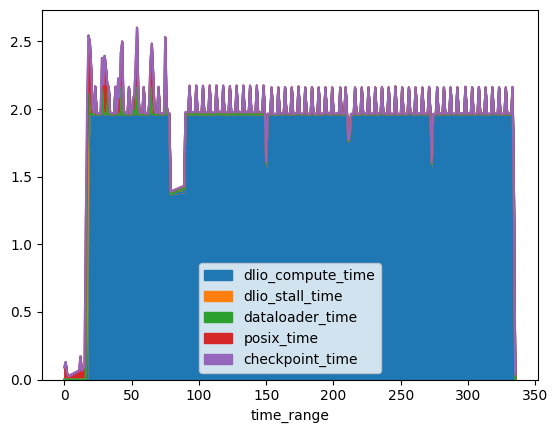

time: 231 ms (started: 2024-12-08 08:58:37 -08:00)


In [24]:
flat_views[('time_range',)][
    [
        'dlio_compute_time',
        'dlio_stall_time',
        # 'compute_time',
        'dataloader_time',
        # 'image_time',
        # 'reader_time',
        'posix_time',
        'checkpoint_time',
        # 'u_dataloader_time',
        # 'u_image_time',
        # 'u_reader_time',
        # 'u_posix_time',
        # 'u_checkpoint_time',
    ]
].plot(kind='area')

In [22]:
import math
from bokeh.palettes import Colorblind
from bokeh.models import ColumnDataSource, LinearAxis, Range1d
from bokeh.plotting import figure, show
from bokeh.io import export_svgs

time_range_view = flat_views[('time_range',)].fillna(0)
time_range_view['posix_data_bw_gb'] = time_range_view['posix_data_bw'] / 1024**3
time_range_view['posix_data_bw_gb_smooth'] = time_range_view['posix_data_bw_gb'].rolling(50).mean()

time_cols = [
    "dlio_compute_time",
    "dlio_stall_time",
    "dataloader_time",
    "posix_time",
    "checkpoint_time",
]

source = ColumnDataSource(time_range_view)

p = figure(
    #     x_range=list(sorted(flat_views[('time_range',)].index.astype(str))),
    height=600,
    width=1200,
    #     title="Fruit Counts by Year",
    #     toolbar_location=None,
    #     tools="hover",
    tooltips="$name @time_range: @$name",
)

p.vbar_stack(
    time_cols,
    x='time_range',
#     width=2,
    color=Colorblind[5],
    source=source,
    legend_label=[
        "Compute Time",
        "Stall Time",
        "Data Loader Time",
        "POSIX I/O Time",
        "Checkpoint Time",
    ],
)
p.y_range = Range1d(0, math.ceil(time_range_view[time_cols].max().max()))
p.yaxis.axis_label = "Time (s)"


p.extra_y_ranges['foo'] = Range1d(0, math.ceil(time_range_view['posix_data_bw_gb'].max()))
ax2 = LinearAxis(y_range_name="foo", axis_label="POSIX I/O Bandwidth")
# ax2.axis_label_text_color = "navy"
p.add_layout(ax2, 'right')
p.line(
    y="posix_data_bw_gb",
    x='time_range',
    source=source,
    color=Colorblind[6][-1],
    line_width=2,
    legend_label='POSIX I/O Bandwidth',
    y_range_name="foo",
)

p.xaxis.axis_label = 'Timeline (s)'
# p.xaxis.axis_label_standoff = 12
# p.xaxis.major_label_standoff = 12

p.y_range.start = 0
p.x_range.range_padding = 0.1
# p.xgrid.grid_line_color = None
# p.axis.minor_tick_line_color = None
# p.outline_line_color = None
p.legend.location = "top_left"
p.legend.orientation = "horizontal"

show(p)

time: 347 ms (started: 2024-12-08 08:57:15 -08:00)


In [25]:
import pandas as pd 
from wisio.metrics import set_metric_scores

time_range_view = pd.read_csv('resnet50_node4_time_range.csv').copy().set_index('time_range')
# time_range_view = pd.read_csv('cosmoflow_node4_proc_name.csv').copy().set_index('proc_name')
time_range_view.index = time_range_view.index.astype(str)

time_range_view['reader_r3_time'] = time_range_view['reader_time'].rolling(window=3).mean()
time_range_view['reader_r3_gauss_time'] = time_range_view['reader_time'].rolling(window=3, win_type='gaussian').mean(std=1)
time_range_view['reader_r3_hann_time'] = time_range_view['reader_time'].rolling(window=3, win_type='hann').mean()

time_range_view['reader_r3_time_per'] = time_range_view['reader_r3_time'] / time_range_view['reader_r3_time'].sum()
time_range_view['reader_r3_gauss_time_per'] = time_range_view['reader_r3_gauss_time'] / time_range_view['reader_r3_gauss_time'].sum()
time_range_view['reader_r3_hann_time_per'] = time_range_view['reader_r3_hann_time'] / time_range_view['reader_r3_hann_time'].sum()

time_range_view['reader_r3_2_time_per'] = time_range_view['reader_r3_time'] / time_range_view['reader_time'].sum()
time_range_view['reader_r3_2_gauss_time_per'] = time_range_view['reader_r3_gauss_time'] / time_range_view['reader_time'].sum()
time_range_view['reader_r3_2_hann_time_per'] = time_range_view['reader_r3_hann_time'] / time_range_view['reader_time'].sum()

time_range_view['reader_r3_time_norm'] = time_range_view['reader_r3_time'] / time_range_view[['dlio_time', 'dataloader_time', 'checkpoint_time', ]].sum().sum()
time_range_view['reader_r3_gauss_time_norm'] = time_range_view['reader_r3_gauss_time'] / time_range_view[['dlio_time', 'dataloader_time', 'checkpoint_time', ]].sum().sum()
time_range_view['reader_r3_hann_time_norm'] = time_range_view['reader_r3_hann_time'] / time_range_view[['dlio_time', 'dataloader_time', 'checkpoint_time', ]].sum().sum()

time_range_view['posix_read_r3_time'] = time_range_view['posix_read_time'].rolling(window=10).sum()
time_range_view['posix_read_r3_gauss_time'] = time_range_view['posix_read_time'].rolling(window=10, win_type='gaussian').sum(std=1)
time_range_view['posix_read_r3_hann_time'] = time_range_view['posix_read_time'].rolling(window=10, win_type='hann').sum()

time_range_view['posix_read_r3_time_per'] = time_range_view['posix_read_r3_time'] / time_range_view['posix_read_r3_time'].sum()
time_range_view['posix_read_r3_gauss_time_per'] = time_range_view['posix_read_r3_gauss_time'] / time_range_view['posix_read_r3_gauss_time'].sum()
time_range_view['posix_read_r3_hann_time_per'] = time_range_view['posix_read_r3_hann_time'] / time_range_view['posix_read_r3_hann_time'].sum()

time_range_view['posix_read_r3_time_norm'] = time_range_view['posix_read_r3_time'] / time_range_view[['dlio_time', 'dataloader_time', 'checkpoint_time', ]].sum().sum()
time_range_view['posix_read_r3_gauss_time_norm'] = time_range_view['posix_read_r3_gauss_time'] / time_range_view[['dlio_time', 'dataloader_time', 'checkpoint_time', ]].sum().sum()
time_range_view['posix_read_r3_hann_time_norm'] = time_range_view['posix_read_r3_hann_time'] / time_range_view[['dlio_time', 'dataloader_time', 'checkpoint_time', ]].sum().sum()

# time_range_view['dlio_compute_util'] = time_range_view['dlio_compute_time'].astype(
#     float
# ) / (
#     time_range_view['dlio_compute_time'].astype(float)
#     + time_range_view['dlio_stall_time'].astype(float)
#     # + time_range_view['checkpoint_time'].astype(float)
# )

time_range_view = set_metric_scores(time_range_view)
# time_range_view['dlio_compute_util_score'] = 8 - time_range_view['dlio_compute_util_score']
# time_range_view['dlio_compute_util_score'] = time_range_view['dlio_compute_util_score'].mask(time_range_view['dlio_compute_time'] == 0, pd.NA)

dlio_cols = ['dlio_compute_util_score'] # [col for col in time_range_view.columns if 'dlio_' in col and col.endswith('_score')]
dataloader_cols = [col for col in time_range_view.columns if 'dataloader_' in col and col.endswith('_score')and col.endswith('_score')]
checkpoint_cols = [col for col in time_range_view.columns if 'checkpoint_' in col and col.endswith('_score')]
posix_cols = [col for col in time_range_view.columns if 'posix_' in col and col.endswith('_score')]
# norm_cols = [col for col in time_range_view.columns if '_score' in col]
# norm_cols = ['dlio_compute_util_score'] + norm_cols
norm_cols = dlio_cols + dataloader_cols + checkpoint_cols + posix_cols

norm_cols = [col for col in norm_cols if 'slope' not in col]

norm_scores = time_range_view[norm_cols]
norm_scores

,dlio_compute_util_score,dataloader_bw_score,dataloader_count_per_score,dataloader_intensity_score,dataloader_ops_rank_score,dataloader_sample_time_norm_score,dataloader_sample_time_per_score,dataloader_time_norm_score,dataloader_time_per_score,u_dataloader_sample_time_norm_score,...,u_posix_read_time_norm_score,u_posix_read_time_per_score,u_posix_seek_time_norm_score,u_posix_seek_time_per_score,u_posix_stat_time_norm_score,u_posix_stat_time_per_score,u_posix_time_norm_score,u_posix_time_per_score,u_posix_write_time_norm_score,u_posix_write_time_per_score
time_range,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,1,3,1,1,1,3,1,3,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,3,1,1,1,3,1,3,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,3,0,0,1,1,1,3,1,6
3,0,0,0,0,0,0,0,0,0,0,...,1,3,0,0,1,2,1,3,1,5
11,0,0,0,0,0,0,0,0,0,0,...,1,3,1,1,1,3,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


time: 267 ms (started: 2024-12-08 08:59:36 -08:00)


In [26]:
import pandas as pd

norm_scores_all = norm_scores.copy()
for col in norm_cols:
    norm_scores2 = norm_scores.copy()
    norm_scores2['score_col'] = col
    norm_scores2['score'] = norm_scores2[col]
    norm_scores_all = pd.concat([norm_scores_all, norm_scores2])
norm_scores_all.drop(columns=norm_cols).dropna()

,score_col,score
time_range,,
0,dlio_compute_util_score,0
1,dlio_compute_util_score,0
2,dlio_compute_util_score,0
3,dlio_compute_util_score,0
11,dlio_compute_util_score,0
...,...,...
331,u_posix_write_time_per_score,0
332,u_posix_write_time_per_score,0
333,u_posix_write_time_per_score,0


time: 1.73 s (started: 2024-12-08 08:59:37 -08:00)


In [27]:
from math import pi

import pandas as pd

from bokeh.models import BasicTicker, PrintfTickFormatter
from bokeh.plotting import figure, show
from bokeh.sampledata.unemployment1948 import data
from bokeh.transform import linear_cmap
from bokeh.palettes import RdYlGn, Reds, TolYlOrBr
from bokeh.io import output_notebook

output_notebook()


VAL_COL = 'proc_id'

years = list(time_range_view.index.astype(str))
months = list(reversed(norm_cols))

# reshape to 1D array or rates with a month and year for each row.
df = norm_scores_all.drop(
    columns=norm_cols
).reset_index().dropna()  # pd.DataFrame(data.stack(), columns=['rate']).reset_index()

# this is the colormap from the original NYTimes plot
colors = [
    "#75968f",
    "#a5bab7",
    "#c9d9d3",
    "#e2e2e2",
    "#dfccce",
    "#ddb7b1",
    "#cc7878",
    "#933b41",
    "#550b1d",
]
mapper = linear_cmap(
    field_name="score",
    palette=Reds[8][::-1],  # Green-to-Red palette with 11 steps
    low=0,
    high=8,
)

TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

p = figure(
    # title=f"US Unemployment ({years[0]} - {years[-1]})",
    x_range=years,
    y_range=months,
    x_axis_location="above",
    width=900,
    height=400,
    tools=TOOLS,
    toolbar_location='below',
    tooltips=[('date', '@time_range'), ('score', '@score%')],
)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "7px"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

r = p.rect(
    x="time_range",
    y="score_col",
    width=1,
    height=1,
    source=df,
    fill_color=mapper, # linear_cmap("score", colors, low=0, high=8),
    line_color=None,
)

p.add_layout(
    r.construct_color_bar(
        major_label_text_font_size="7px",
        ticker=BasicTicker(desired_num_ticks=len(colors)),
        formatter=PrintfTickFormatter(format="%d%%"),
        label_standoff=6,
        border_line_color=None,
        padding=5,
    ),
    'right',
)

show(p)

Loading BokehJS ...

time: 294 ms (started: 2024-12-08 08:59:39 -08:00)


In [14]:
import pandas as pd

df3 = pd.read_csv('resnet50_node4_proc_name.csv')

time: 180 ms (started: 2024-12-02 09:33:52 -08:00)


<Axes: >

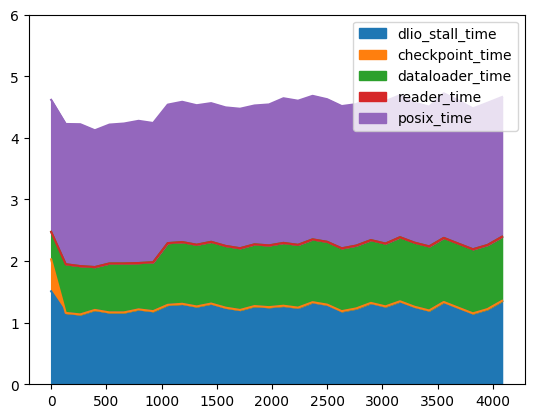

time: 256 ms (started: 2024-12-02 11:43:02 -08:00)


In [42]:
df3.query('compute_time > 0').sort_index()[
    # ['dlio_compute_time', 'dlio_stall_time', 'posix_time']
    [
        # 'compute_time',
        # 'dlio_compute_time',
        'dlio_stall_time',
        'checkpoint_time',
        'dataloader_time',
        'reader_time',
        # 'dataloader_sample_time',
        'posix_time',
    ]
].plot(kind='area', ylim=(0, 6))

<Axes: >

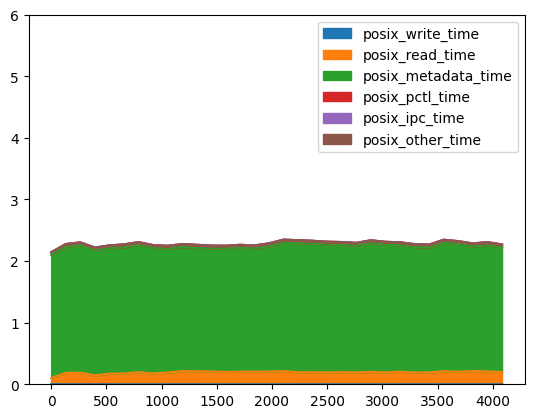

time: 252 ms (started: 2024-12-02 11:39:13 -08:00)


In [40]:
df3.query('compute_time > 0').sort_index()[
    # ['dlio_compute_time', 'dlio_stall_time', 'posix_time']
    [
        # 'compute_time',
        # 'dlio_compute_time',
        # 'dlio_stall_time',
        # 'checkpoint_time',
        # 'dataloader_time',
        # 'reader_time',
        # 'dataloader_sample_time',
        # 'posix_time',
        'posix_write_time',
        'posix_read_time',
        'posix_metadata_time',
        'posix_pctl_time',
        'posix_ipc_time',
        'posix_other_time',
    ]
].plot(kind='area', ylim=(0, 6))

<Axes: >

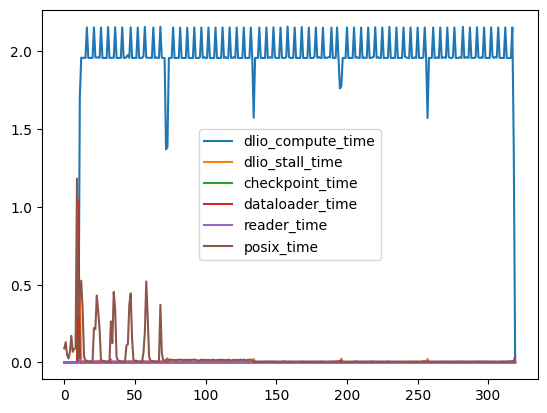

time: 217 ms (started: 2024-12-02 09:46:46 -08:00)


In [33]:
pd.read_csv('resnet50_node4_time_range.csv').sort_index()[
    # ['dlio_compute_time', 'dlio_stall_time', 'posix_time']
    [
        # 'compute_time',
        'dlio_compute_time',
        'dlio_stall_time',
        'checkpoint_time',
        'dataloader_time',
        'reader_time',
        # 'dataloader_sample_time',
        'posix_time',
    ]
].plot()

<Axes: >

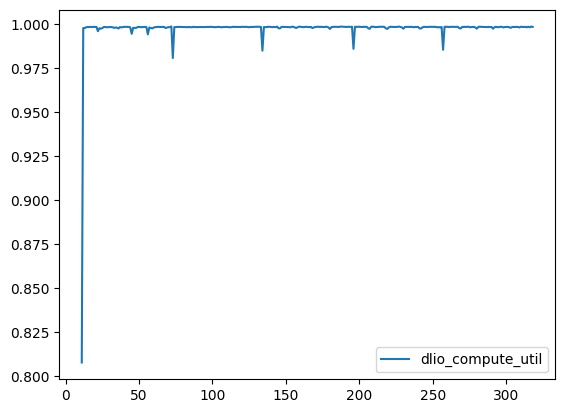

time: 216 ms (started: 2024-12-02 09:36:04 -08:00)


In [24]:
pd.read_csv('resnet50_node4_time_range.csv').query('compute_time > 0').sort_index()[
    # ['dlio_compute_time', 'dlio_stall_time', 'posix_time']
    [
        # 'compute_time',
        'dlio_compute_util',
        # 'checkpoint_time',
        # 'dataloader_time',
        # 'reader_time',
        # 'dataloader_sample_time',
        # 'posix_time',
    ]
].plot()

In [34]:
pd.read_csv('resnet50_node4_time_range.csv')[
    [
        'compute_time',
        'checkpoint_time',
        'dlio_compute_time',
        'dlio_stall_time',
        'dlio_time',
        'dataloader_time',
        'dataloader_sample_time',
        'posix_time',
        'u_checkpoint_time',
        'u_dataloader_time',
        'u_dataloader_sample_time',
        'u_posix_time',
    ]
].sum()

compute_time                610.270032
checkpoint_time               0.518235
dlio_compute_time           611.562038
dlio_stall_time               2.136197
dlio_time                   613.144394
dataloader_time               1.040580
dataloader_sample_time        0.000000
posix_time                   11.218220
u_checkpoint_time             0.518223
u_dataloader_time             1.040513
u_dataloader_sample_time      0.000000
u_posix_time                  2.295278
dtype: float64

time: 27.2 ms (started: 2024-12-02 10:26:45 -08:00)


In [35]:
pd.read_csv('resnet50_node16_time_range.csv')[
    [
        'compute_time',
        'checkpoint_time',
        'dlio_compute_time',
        'dlio_stall_time',
        'dlio_time',
        'dataloader_time',
        'dataloader_sample_time',
        'posix_time',
        'u_checkpoint_time',
        'u_dataloader_time',
        'u_dataloader_sample_time',
        'u_posix_time',
    ]
].sum()

compute_time                152.290957
checkpoint_time               0.511097
dlio_compute_time           153.439338
dlio_stall_time               1.087349
dlio_time                   153.850604
dataloader_time               1.551747
dataloader_sample_time        0.000000
posix_time                    6.422795
u_checkpoint_time             0.511097
u_dataloader_time             1.551650
u_dataloader_sample_time      0.000000
u_posix_time                  2.734226
dtype: float64

time: 20.7 ms (started: 2024-12-02 10:26:53 -08:00)


In [36]:
pd.read_csv('resnet50_node4_proc_name.csv')[
    [
        'compute_time',
        'checkpoint_time',
        'dlio_compute_time',
        'dlio_stall_time',
        'dlio_time',
        'dataloader_time',
        'dataloader_sample_time',
        'posix_time',
        'u_checkpoint_time',
        'u_dataloader_time',
        'u_dataloader_sample_time',
        'u_posix_time',
    ]
].max()

compute_time                610.060017
checkpoint_time               0.518231
dlio_compute_time           611.353542
dlio_stall_time               1.509368
dlio_time                   612.803145
dataloader_time               1.040571
dataloader_sample_time        0.000000
posix_time                    2.456626
u_checkpoint_time             0.000000
u_dataloader_time             0.000000
u_dataloader_sample_time      0.000000
u_posix_time                  2.456626
dtype: float64

time: 156 ms (started: 2024-12-02 10:27:35 -08:00)


In [37]:
pd.read_csv('resnet50_node16_proc_name.csv')[
    [
        'compute_time',
        'checkpoint_time',
        'dlio_compute_time',
        'dlio_stall_time',
        'dlio_time',
        'dataloader_time',
        'dataloader_sample_time',
        'posix_time',
        'u_checkpoint_time',
        'u_dataloader_time',
        'u_dataloader_sample_time',
        'u_posix_time',
    ]
].max()

compute_time                152.278385
checkpoint_time               0.511084
dlio_compute_time           153.379203
dlio_stall_time               0.906808
dlio_time                   153.841353
dataloader_time               1.551685
dataloader_sample_time        0.000000
posix_time                    2.655606
u_checkpoint_time             0.000000
u_dataloader_time             0.000000
u_dataloader_sample_time      0.000000
u_posix_time                  1.420335
dtype: float64

time: 326 ms (started: 2024-12-02 10:27:44 -08:00)


In [39]:
pd.read_csv('resnet50_node4_host_name.csv')[
    [
        'compute_time',
        'checkpoint_time',
        'dlio_compute_time',
        'dlio_stall_time',
        'dlio_time',
        'dataloader_time',
        'dataloader_sample_time',
        'posix_time',
        'u_checkpoint_time',
        'u_dataloader_time',
        'u_dataloader_sample_time',
        'u_posix_time',
    ]
].max()

compute_time                610.060017
checkpoint_time               0.518231
dlio_compute_time           611.353542
dlio_stall_time               1.509368
dlio_time                   612.803145
dataloader_time               1.040571
dataloader_sample_time        0.000000
posix_time                    2.456626
u_checkpoint_time             0.000000
u_dataloader_time             0.000000
u_dataloader_sample_time      0.000000
u_posix_time                  0.000000
dtype: float64

time: 18.1 ms (started: 2024-12-02 10:28:03 -08:00)


In [38]:
pd.read_csv('resnet50_node16_host_name.csv')[
    [
        'compute_time',
        'checkpoint_time',
        'dlio_compute_time',
        'dlio_stall_time',
        'dlio_time',
        'dataloader_time',
        'dataloader_sample_time',
        'posix_time',
        'u_checkpoint_time',
        'u_dataloader_time',
        'u_dataloader_sample_time',
        'u_posix_time',
    ]
].max()

compute_time                152.278385
checkpoint_time               0.511084
dlio_compute_time           153.379203
dlio_stall_time               0.906808
dlio_time                   153.841353
dataloader_time               1.551685
dataloader_sample_time        0.000000
posix_time                    2.655606
u_checkpoint_time             0.000000
u_dataloader_time             0.000000
u_dataloader_sample_time      0.000000
u_posix_time                  0.000000
dtype: float64

time: 19.2 ms (started: 2024-12-02 10:27:57 -08:00)


In [10]:
metric_boundaries

{('proc_name',): 1227.012886,
 ('time_range',): 1237.8225360000001,
 ('proc_name', 'time_range'): 1237.8225360000001,
 ('time_range', 'proc_name'): 1227.012886,
 ('proc_name', 'host_name'): 1227.012886,
 ('proc_name', 'proc_id'): 1227.012886,
 ('proc_name', 'thread_id'): 1227.012886}

time: 2.57 ms (started: 2024-12-02 09:33:04 -08:00)


In [ ]:
analyzer.write_bottlenecks(result.flat_bottlenecks)

In [ ]:
output.handle_result(metrics=[], result=result)

In [ ]:
bottlenecks = analyzer.read_bottlenecks()

In [ ]:
from bokeh.io import show
from wisio.plots import plot_bottleneck_summary

show(plot_bottleneck_summary(bottlenecks, groupby=('layer', 'view_name')))

In [ ]:
show(plot_bottleneck_summary(bottlenecks, groupby=('layer', 'view_name', 'metric')))